# Loading Video Frames

``trackpy`` uses three classes for loading video:

* [`ImageSequence`](https://github.com/soft-matter/pims/blob/155b01dca6941c4d56ee8f8b075f788ef092b2f5/pims/image_sequence.py#L36-L189) reads images from a directory.
* [`FFmpegVideoReader`](https://github.com/soft-matter/pims/blob/155b01dca6941c4d56ee8f8b075f788ef092b2f5/pims/ffmpeg_reader.py#L92-L246) reads standard video files (AVI, MOV, etc.).
* [`TiffStack`](https://soft-matter.github.io/pims/v0.4/tiff_stack.html) reads multi-frame TIF / TIFF files.

Once loaded, these objects can be handled alike. In programming terms, each is a subclass of a generic [`FramesSequence`](https://github.com/soft-matter/pims/blob/9cb60cedc9556104e5f935a5b5ff9b3324315ce1/pims/base_frames.py#L82-L127) object. (Also see the [custom readers](https://github.com/soft-matter/pims/blob/f6c55cdfb8d31ee80c9f24349d926edd2ccaee8a/doc/source/custom_readers.rst) example.)

The differences between the formats are all handled invisibly.

### Load sequential images from a directory.

Take ``ImageSequence`` as an example. We have a folder of images at `../sample_data/bulk_water`. We can load them into an ``ImageSequence`` object.

In [1]:
# We also need Python's plotting library, matplotlib.
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'  # Set grayscale images as default.

import trackpy as tp
import pims

In [2]:
v = pims.ImageSequence('../sample_data/bulk_water/*.png')

We can access any frame like `v[frame_number]`. We can print it directly, as an array of brightness values, or we can visualize it using `imshow`.

Frame([[[ 0.57254905,  0.49019608,  0.21176471,  1.        ],
        [ 0.57254905,  0.49019608,  0.21176471,  1.        ],
        [ 0.57254905,  0.49019608,  0.21960784,  1.        ],
        ..., 
        [ 0.54901963,  0.47058824,  0.21568628,  1.        ],
        [ 0.5529412 ,  0.47058824,  0.23137255,  1.        ],
        [ 0.55686277,  0.47450981,  0.23529412,  1.        ]],

       [[ 0.57254905,  0.49019608,  0.21176471,  1.        ],
        [ 0.57254905,  0.49019608,  0.21176471,  1.        ],
        [ 0.57254905,  0.49019608,  0.21960784,  1.        ],
        ..., 
        [ 0.54901963,  0.47058824,  0.21568628,  1.        ],
        [ 0.55686277,  0.47450981,  0.23529412,  1.        ],
        [ 0.55686277,  0.47450981,  0.23529412,  1.        ]],

       [[ 0.57254905,  0.49019608,  0.21960784,  1.        ],
        [ 0.57254905,  0.49019608,  0.21960784,  1.        ],
        [ 0.57254905,  0.48627451,  0.22745098,  1.        ],
        ..., 
        [ 0.5529412 ,  0.47450981,  0.21960784,  1.        ],
        [ 0.56078434,  0.48235294,  0.23137255,  1.        ],
        [ 0.56470591,  0.48627451,  0.23529412,  1.        ]],

       ..., 
       [[ 0.57254905,  0.49019608,  0.25882354,  1.        ],
        [ 0.57647061,  0.49411765,  0.26274511,  1.        ],
        [ 0.57254905,  0.49019608,  0.25098041,  1.        ],
        ..., 
        [ 0.50588238,  0.42352942,  0.14509805,  1.        ],
        [ 0.47058824,  0.38431373,  0.1254902 ,  1.        ],
        [ 0.46666667,  0.38039216,  0.12156863,  1.        ]],

       [[ 0.57254905,  0.49019608,  0.25098041,  1.        ],
        [ 0.57254905,  0.49019608,  0.25098041,  1.        ],
        [ 0.56862748,  0.49019608,  0.23921569,  1.        ],
        ..., 
        [ 0.53725493,  0.45490196,  0.18431373,  1.        ],
        [ 0.50588238,  0.42745098,  0.17254902,  1.        ],
        [ 0.49411765,  0.41568628,  0.16078432,  1.        ]],

       [[ 0.57254905,  0.49019608,  0.25098041,  1.        ],
        [ 0.57254905,  0.49019608,  0.25098041,  1.        ],
        [ 0.56862748,  0.49019608,  0.23921569,  1.        ],
        ..., 
        [ 0.56862748,  0.48627451,  0.21568628,  1.        ],
        [ 0.54509807,  0.46666667,  0.21176471,  1.        ],
        [ 0.53725493,  0.45882353,  0.20392157,  1.        ]]], dtype=float32)
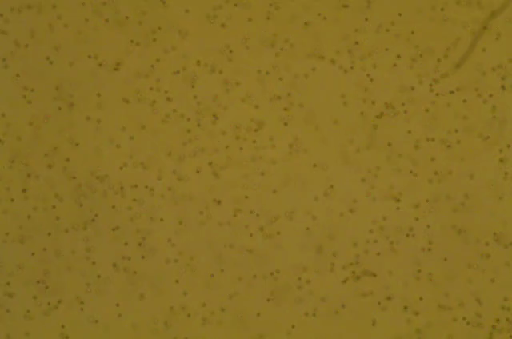

In [3]:
v[0]

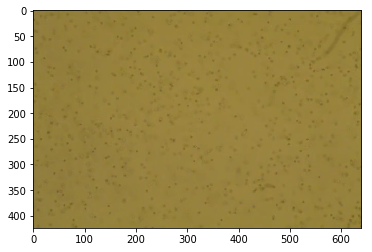

In [4]:
plt.imshow(v[0]);

This is a color image. Most analysis will require a grayscale image. There are many ways to convert color to gray. Below, we just define a simple function to take the red channel only.

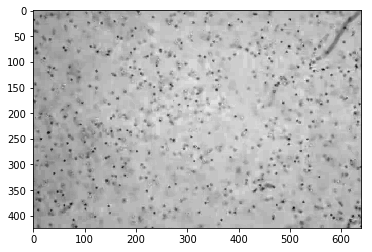

In [5]:
def gray(image):
    return image[:, :, 0]

v = pims.ImageSequence('../sample_data/bulk_water/*.png', process_func=gray)
plt.figure()
plt.imshow(v[0]);

### Use subsections of the loaded frames.

We can select a subset of the frames for viewing or processing. Examples:

* ``v[3]`` frame three (an array)
* ``v[:10]`` first 10 frames (a list of arrays)
* ``v[2:5]`` frames 2-5 including 2 and 5 (a list of arrays)
* ``v[100:]`` frames 100 to the end (a list of arrays)

In [6]:
for frame in v[2:5]:
    # Do something with each frame.
    pass

### Load multi-frame TIFFs or video files.

`ImageSequence` works out of the box. It relies only on numpy and scipy, which are required dependencies of `trackpy`. `FFmpegVideoReader` needs [FFmpeg](https://ffmpeg.org/), an open-source video reader not related to Python. (See the installation instructions in the README.). `TiffStack` needs either [PIL (Python Imaging Library)](http://pythonware.com/products/pil/) or [libtiff](http://libtiff.org/); it can use whichever is available.

Once these dependencies are in place, ``Video`` and ``TiffStack`` work in the same way as ``ImageSequence``.